In [341]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
# K-Means clusterer 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [342]:
from sklearn.metrics import pairwise_distances

Make some blobs

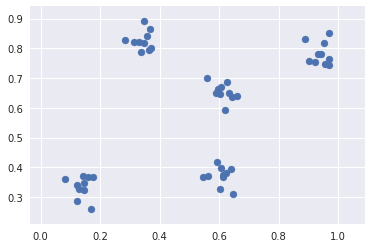

In [352]:
centers = np.random.rand(5,2)
blobs = make_blobs(50, centers=centers,cluster_std=0.03, random_state=2)[0]
plt.scatter(blobs.T[0], blobs.T[1])
plt.axis('equal');

In [353]:
def find_clusters(X, n_clusters, rseed):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
#     centers = np.random.rand(n_clusters,2)
    labels_rec = []
    centers_rec = [centers]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, axis=1)
#         labels = pairwise_distances(X, centers).argmin(axis=1)
        labels_rec.append(labels)
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        centers_rec.append(new_centers)
    return centers_rec, labels_rec

In [354]:
def plot_kmeans(X, n_clusters):
    centers, labels = find_clusters(X, n_clusters, 6)

    my_cmap = ListedColormap(sns.color_palette(palette='muted', n_colors=n_clusters).as_hex())
    fig, axes = plt.subplots(len(centers),1, figsize=(6,17))
    for i, ax in enumerate(axes):
        ax.scatter(X[:,0], X[:,1], c=labels[i], cmap=my_cmap, alpha=0.8)
        ax.scatter(centers[i][:,0], centers[i][:,1], s=100, marker='x', c='k')
        ax.axis('equal')
    plt.show()

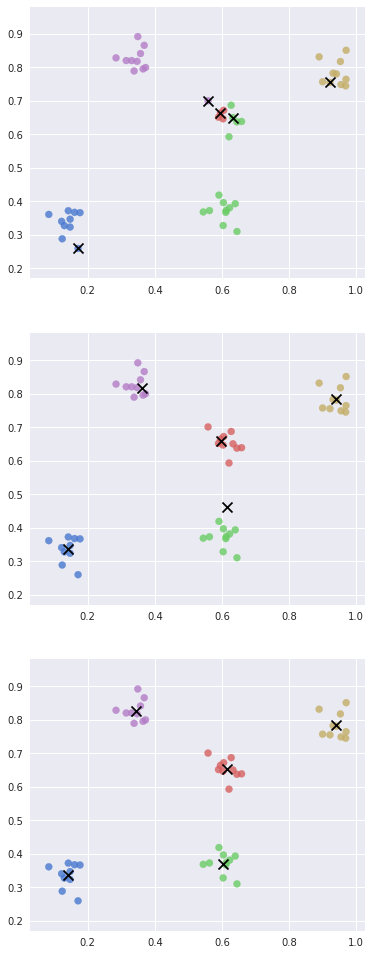

In [357]:
plot_kmeans(blobs, 5)